# 第一題

In [294]:
class Card:
    def __init__(self, suit, rank):
        rank_map = {'A': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7,
                    '8': 8, '9': 9, '10': 10, 'J': 11, 'Q': 12, 'K': 13}
        self.suit = suit
        self.rank = rank_map[rank]
        # something else

    def __str__(self):
        return '{suit}{rank}'.format(suit=self.suit, rank=self.rank)


class Hand:
    def __init__(self):
        self.cards = []

    def __str__(self):
        return ", ".join(str(card) for card in self.cards)

    def add_card(self, card):
        self.cards.append(card)

    def rank_counts(self):
        rank_count = dict()
        for card in self.cards:
            try:
                rank_count[card.rank] += 1
            except:
                rank_count[card.rank] = 1
        return rank_count

    def rule_a(self):
        '''規則 a：如果你打出一張 A，你可以獲得 1 分'''
        rank_counts = self.rank_counts()
        return 1 in rank_counts.keys()

    def rule_b(self):
        '''規則 b：如果你打出一對，也就是有兩張相同點數的牌，每對可以獲得 2 分'''
        rank_counts = self.rank_counts()
        return [rank for rank, count in rank_counts.items() if count >= 2]

    def rule_c(self):
        '''規則 c：如果你打出同花，也就是五張同一花色的牌，你可以獲得 3 分'''
        suits = [card.suit for card in self.cards]
        return len(set(suits)) == 1

    # TODO
    def rule_d(self):
        '''規則 d：如果你打出順子，也就是五張順連的牌，你可以獲得 5 分'''
        rank_counts = self.rank_counts()
        if len(rank_counts.keys()) == 5:
            observed_ranks = sorted(list(rank_counts.keys()))
            expected_rank = observed_ranks[0]
            i = 1
            while i < 5:
                if expected_rank + 1 == observed_ranks[i]:
                    expected_rank += 1
                elif expected_rank + 9 == observed_ranks[i]:
                    expected_rank += 9
                else:
                    break
                i += 1
            return i == 5
        else:
            return False

    def rule_e(self):
        '''規則 e：如果你打出葫蘆，也就是三張同一點數的牌，加一對其他點數的牌，你可以獲得 10 分'''
        rank_counts = self.rank_counts()
        return {3, 2} == set(rank_counts.values())

    def rule_f(self):
        '''規則 f：如果你打出四條，也就是四張同一點數的牌，你可以獲得 20 分'''
        rank_counts = self.rank_counts()
        return 4 in rank_counts.values()

    def rule_g(self):
        '''規則 g：如果你打出同花順，也就是五張同一花色且順連的牌，你可以獲得 100 分'''
        return self.rule_c() and self.rule_d()

    def max_point(self):
        rank_counts = self.rank_counts()
        point = 0
        if self.rule_g():
            point = 100
        elif self.rule_f():
            point = 20
            if self.rule_a() and rank_counts[1] == 1:
                point += 1
        elif self.rule_e():
            point = 10
        elif self.rule_d():
            point = 5
        elif self.rule_c():
            point = 3
        elif self.rule_b():
            point = 2*sum([value//2 for value in rank_counts.values()])
            if self.rule_a() and (rank_counts[1] in [1, 3]):
                point += 1
        elif self.rule_a():
            point = 1
        return point

# 輸入資料：
all_suit = input().split(',')
all_rank = input().split(',')

hand = Hand()
for suit, rank in zip(all_suit, all_rank):
    hand.add_card(Card(suit, rank))

# 輸出結果
print(hand.max_point())


H,H,H,H,H
A,A,5,8,9
3


# 第二題

In [383]:
# 定義卡片物件
class Card:
    def __init__(self, suit, rank):
        rank_map = {'A': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7,
                    '8': 8, '9': 9, '10': 10, 'J': 11, 'Q': 12, 'K': 13}
        self.suit = suit
        self.rank = rank_map[rank]
        # something else

    def __str__(self):
        return '{suit}{rank}'.format(suit=self.suit, rank=self.rank)


# 定義手牌物件
class Deck:
    def __init__(self):
        self.cards = []

    def __str__(self):
        return ", ".join(str(card) for card in self.cards)

    # methods for add or remove card
    def add_card(self, card):
        self.cards.append(card)

    def remove_card(self, index):
        self.cards.pop(index)

    def conflict(self, new_card):
        conflict_card = []
        for i, card in enumerate(self.cards):
            conflict_rank = (card.rank + 1) if (card.rank + 1) <= 13 else 1
            if new_card.suit == card.suit and new_card.rank == conflict_rank:
                conflict_card.append(i)
        return conflict_card

    # methods for computing scores
    def rank_counts(self):
        rank_count = dict()
        for card in self.cards:
            try:
                rank_count[card.rank] += 1
            except:
                rank_count[card.rank] = 1
        return rank_count

    def rule_a(self):
        '''規則 a：如果你打出一張 A，你可以獲得 1 分'''
        rank_counts = self.rank_counts()
        return 1 in rank_counts.keys()

    def rule_b(self):
        '''規則 b：如果你打出一對，也就是有兩張相同點數的牌，每對可以獲得 2 分'''
        rank_counts = self.rank_counts()
        return [rank for rank, count in rank_counts.items() if count >= 2]

    def rule_c(self):
        '''規則 c：如果你打出同花，也就是五張同一花色的牌，你可以獲得 3 分'''
        suits = [card.suit for card in self.cards]
        return len(suits) == 5 and len(set(suits)) == 1

    def rule_d(self):
        '''規則 d：如果你打出順子，也就是五張順連的牌，你可以獲得 5 分'''
        rank_counts = self.rank_counts()
        if len(rank_counts.keys()) == 5:
            observed_ranks = sorted(list(rank_counts.keys()))
            expected_rank = observed_ranks[0]
            i = 1
            while i < 5:
                if expected_rank + 1 == observed_ranks[i]:
                    expected_rank += 1
                elif expected_rank + 9 == observed_ranks[i]:
                    expected_rank += 9
                else:
                    break
                i += 1
            return i == 5
        else:
            return False

    def rule_e(self):
        '''規則 e：如果你打出葫蘆，也就是三張同一點數的牌，加一對其他點數的牌，你可以獲得 10 分'''
        rank_counts = self.rank_counts()
        return {3, 2} == set(rank_counts.values())

    def rule_f(self):
        '''規則 f：如果你打出四條，也就是四張同一點數的牌，你可以獲得 20 分'''
        rank_counts = self.rank_counts()
        return 4 in rank_counts.values()

    def rule_g(self):
        '''規則 g：如果你打出同花順，也就是五張同一花色且順連的牌，你可以獲得 100 分'''
        return self.rule_c() and self.rule_d()

    def max_point(self):
        rank_counts = self.rank_counts()
        point = 0
        if self.rule_g():
            point = 100
        elif self.rule_f():
            point = 20
            if self.rule_a() and rank_counts[1] == 1:
                point += 1
        elif self.rule_e():
            point = 10
        elif self.rule_d():
            point = 5
        elif self.rule_c():
            point = 3
        elif self.rule_b():
            point = 2*sum([value//2 for value in rank_counts.values()])
            if self.rule_a() and (rank_counts[1] in [1, 3]):
                point += 1
        elif self.rule_a():
            point = 1
        return point


# 輸入資料
player_num = int(input())
player = dict()
player_scores = []
for i in range(player_num):
    cards = input().split(',')
    deck = Deck()
    for card in cards:
        card = Card(card[:1], card[1:])
        if len(deck.cards) == 5:
            break
        elif deck.conflict(card):
            deck.remove_card(deck.conflict(card)[0])
            continue
        else:
            deck.add_card(card)
    player[i] = deck
    player_score = deck.max_point()
    player_scores.append(player_score)

# 輸出結果
print(*player_scores, sep=',')
# print(','.join(player_scores))

2
SK,S8,S3,H2,C6,SA,S2,H3,S4
SK,S8,S3,H2,S4,SA,S2,H3,C6
0,0


# 第三題

In [468]:
# 載入處理時間的套件
from dateutil.parser import parse


# 定義狗狗類別
class Dog:
    def __init__(self, name, height, weight, adopted_date):
        self.name = name
        self.height = height
        self.weight = weight
        self.adopted_date = adopted_date
        self.dust = 0
        self.walk_count = 0
        self.longest_duration = 0
        self.last_walk_date = adopted_date
        self.is_small_dog = self.check_if_small_dog()

    def __str__(self):
        infos = vars(self)
        return ', '.join('{prprty}: {value}'.format(prprty=prprty, value=value) for prprty, value in infos.items())

    def check_if_small_dog(self):
        '''判斷是否為小型犬，回傳boolean值'''
        return self.height <= 60 and self.weight <= 30

    def walk(self, walk_date):
        if self.is_small_dog:
            # 依據小型犬的灰塵累積效率更新累積灰塵量
            self.dust += 3
        else:
            # 依據大型犬的灰塵累積效率更新累積灰塵量
            self.dust += 2
        # 更新散步次數、最大散步間隔時間、最近散步日期
        current_duration = (walk_date - self.last_walk_date).days
        self.walk_count += 1
        self.longest_duration = current_duration if current_duration > self.longest_duration else self.longest_duration
        self.last_walk_date = walk_date

    def bathe(self):
        '''洗澡：灰塵量歸零'''
        self.dust = 0

    def walk_frequency(self, current_date):
        '''計算散步頻率＝總散步次數/領養至今的天數'''
        day_count = (current_date - self.adopted_date).days
        return self.walk_count / day_count

    def print_info(self):
        '''印出所求資訊：含目標狗狗的名字、身高、體重以及累積灰塵量，分別以半形逗號隔開'''
        print('{name},{height},{weight},{dust}'.format(name=self.name, height=self.height, weight=self.weight, dust=self.dust))


# 輸入資料：今日日期
def input_today():
    today = input()
    today = parse(today)  # 轉為datetime.datetime物件
    return today


# 輸入資料：任務
def input_task():
    task = input().split(',')
    return task


# 輸入資料：狗狗資訊
def input_dog_infos():
    # 建立字典以儲存所有狗狗物件
    all_dog_info = dict()
    while True:
        dog_info = input()
        # 若出現'Done'表輸入完畢
        if dog_info == 'Done':
            break

        # 根據事件更新狗狗資訊
        dog_info = dog_info.split('|')
        event = dog_info[0]
        name = dog_info[1]
        if event == 'A':
            # 愛莎領養狗狗
            dog = Dog(name, int(dog_info[2]), int(dog_info[3]), parse(dog_info[4]))
            all_dog_info[name] = dog
        elif event == 'B':
            # 狗狗洗澡
            dog = all_dog_info[name]
            dog.bathe()
            all_dog_info[name] = dog  # 將執行完的結果存回狗狗字典
        elif event == 'W':
            # 狗狗散步
            dog = all_dog_info[name]
            dog.walk(parse(dog_info[2]))
            all_dog_info[name] = dog  # 將執行完的結果存回狗狗字典
        else:
            # 狗狗換主人
            all_dog_info.pop(name)
    return all_dog_info


# 定義各task
def task_A(all_dog_info, dog_specified):
    '''找出名字為給定名稱的狗狗'''
    dog = all_dog_info[dog_specified]
    dog.print_info()


def task_B(all_dog_info, current_date):
    '''找出散步頻率最低的狗狗'''
    all_walk_frequency = {dog.name: [dog.walk_frequency(current_date),
                                     dog.is_small_dog,
                                     dog.weight,
                                     dog.height,
                                     dog.name[0]] for dog in all_dog_info.values()}
    all_walk_frequency = sorted(all_walk_frequency.items(), key=lambda l: (l[1][0], l[1][1], -l[1][2], -l[1][3], l[1][4]))
    dog = all_dog_info[all_walk_frequency[0][0]]
    dog.print_info()


def task_C(all_dog_info):
    '''找出最大散步間隔時間最長的狗狗'''
    all_longest_duration = {dog.name: [dog.longest_duration,
                                       dog.is_small_dog,
                                       dog.weight,
                                       dog.height,
                                       dog.name[0]] for dog in all_dog_info.values()}
    all_longest_duration = sorted(all_longest_duration.items(), key=lambda l: (-l[1][0], l[1][1], -l[1][2], -l[1][3], l[1][4]))
    dog = all_dog_info[all_longest_duration[0][0]]
    dog.print_info()


def task_D(all_dog_info):
    '''找出累積灰塵量最多的狗狗'''
    all_dust = {dog.name: [dog.dust,
                           dog.is_small_dog,
                           dog.weight,
                           dog.height,
                           dog.name[0]] for dog in all_dog_info.values()}
    all_dust = sorted(all_dust.items(), key=lambda l: (-l[1][0], l[1][1], -l[1][2], -l[1][3], l[1][4]))
    dog = all_dog_info[all_dust[0][0]]
    dog.print_info()


# 定義主程式並執行
def main():
    # 輸入資料
    today = input_today()
    task = input_task()
    all_dog_info = input_dog_infos()

    # 執行任務
    if task[0] == 'TaskA':
        task_A(all_dog_info, task[1])
    elif task[0] == 'TaskB':
        task_B(all_dog_info, today)
    elif task[0] == 'TaskC':
        task_C(all_dog_info)
    else:
        task_D(all_dog_info)

main()


# 第四題

In [550]:
# 載入套件
import pandas as pd
import matplotlib.pyplot as plt

In [580]:
# 載入檔案
data = pd.read_csv('submission_complete.csv')

In [581]:
data

,Unnamed: 0,submission_id,status,user,challenge,problem,score,time,memory,code_length,submit_time
0,0,345685,Accepted,0b98869a,PBC 109-1 HW0,HW0 (1) 找錢問題,20,509,29958144.0,169,2020-09-14 21:05:58.0
1,1,345687,Accepted,b4452e44,PBC 109-1 HW0,HW0 (1) 找錢問題,20,516,29970432.0,149,2020-09-14 21:08:32.0
2,2,345688,Accepted,9c91e3b9,PBC 109-1 HW0,HW0 (1) 找錢問題,20,521,29958144.0,149,2020-09-14 21:08:48.0
3,3,345689,Accepted,37d1ea6a,PBC 109-1 HW0,HW0 (1) 找錢問題,20,532,29962240.0,136,2020-09-14 21:09:51.0
4,4,345691,Wrong Answer,e735f30b,PBC 109-1 HW0,HW0 (1) 找錢問題,0,515,29958144.0,270,2020-09-14 21:11:20.0
...,...,...,...,...,...,...,...,...,...,...,...
100901,109214,500828,Runtime error,4eeecfc2,PBC 109-1 HW6,HW6 (1) 字串比對,0,2999,87855104.0,1382,2020-11-23 10:56:34.0
100902,109768,501393,Wrong Answer,37f16215,PBC 109-1 HW7,HW7 (2) 尋找電影,0,775,29966336.0,2,2020-11-23 11:23:09.0
100903,110377,502010,Runtime error,b58066e4,PBC 109-1 HW0,HW0 (1) 找錢問題,0,1884,87859200.0,2808,2020-11-23 11:44:42.0
100904,112025,503726,Wrong Answer,f466a030,PBC 109-1 HW6,HW6 (3) 股票消息面分析,4,799,30224384.0,5380,2020-11-23 14:27:37.0


In [582]:
submission_count = Counter(data.problem)

In [596]:
labels, values = zip(*submission_count.items())

In [597]:
labels = tuple([label[:7] for label in labels])

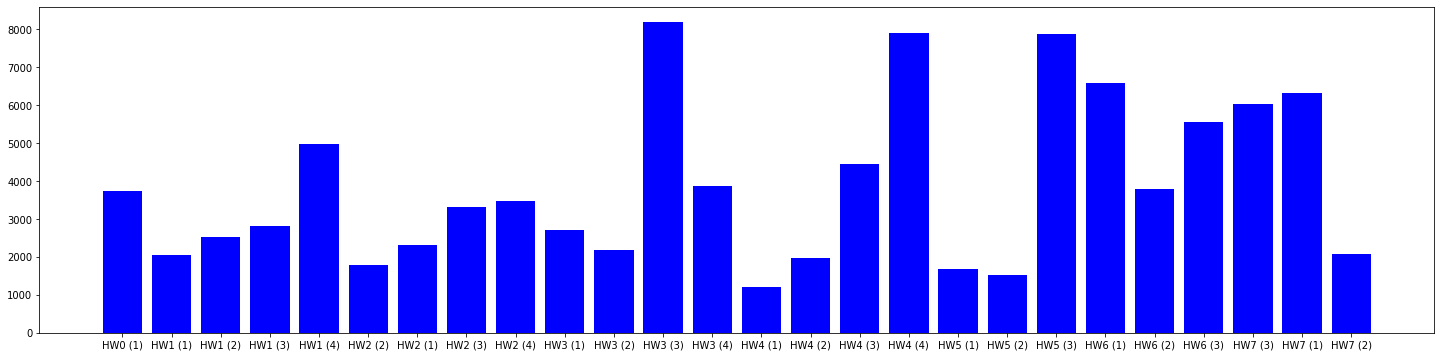

In [602]:
figure, ax = plt.subplots()
figure.set_size_inches(25, 6)
ax.bar(labels, values, color='b')
plt.show()

In [608]:
user_count = Counter(data.user)

In [609]:
user_count

Counter({'0b98869a': 100,
         'b4452e44': 132,
         '9c91e3b9': 123,
         '37d1ea6a': 189,
         'e735f30b': 157,
         'daa8b33f': 197,
         'c5e7f636': 150,
         '18a1c01b': 86,
         'f11a213f': 132,
         'dd99319c': 96,
         '7a2b5b6e': 119,
         '2521e945': 52,
         '01980ffe': 180,
         'b486ba18': 204,
         'de0aebe4': 97,
         'c33fa7a9': 116,
         '80c93b97': 158,
         'cb9ab9cc': 86,
         '0f06e10d': 110,
         '0abea6cb': 586,
         '89af8cf1': 489,
         'ec9fceeb': 185,
         '7d550210': 194,
         '8cd2cd4e': 121,
         '0175ffd4': 214,
         '6f73c5ce': 217,
         'fc1e084d': 206,
         '324e328d': 88,
         'f7cf7186': 327,
         'e8429ed1': 160,
         '810de507': 36,
         '5464fbe7': 104,
         '71704d19': 78,
         'e7bec0d3': 64,
         '15b8ebbd': 134,
         '41497af1': 113,
         '48b27832': 106,
         'cb6b1543': 153,
         'dd30606e': 